<h1> Deep Learning: Age & Gender Prediction Using CNN (Convolutional Neural Network) <h1>

## Load and Read Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!mkdir -p ~/.kaggle #membuat directory bernama kaggle 
!cp kaggle.json ~/.kaggle/ #copy file kaggle.json upload tadi ke directory baru
!chmod 600 ~/.kaggle/kaggle.json #berikan izin untuk file kaggle.jsonv

In [3]:
!kaggle datasets download -d ttungl/adience-benchmark-gender-and-age-classification

 99% 1.38G/1.39G [00:35<00:00, 65.5MB/s]
100% 1.39G/1.39G [00:36<00:00, 41.1MB/s]


In [4]:
from zipfile import ZipFile
file_name = "adience-benchmark-gender-and-age-classification.zip"

with ZipFile(file_name,'r') as zip :
  zip.extractall()
  print('Berhasil')

Berhasil


In [5]:
#Baca data csv
fold0 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt",sep = "\t" )
fold1 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt",sep = "\t")
fold2 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt",sep = "\t")
fold3 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt",sep = "\t")
fold4 = pd.read_csv("AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt",sep = "\t")

In [6]:
#Merge data
total_data = pd.concat([fold0, fold1, fold2, fold3, fold4], ignore_index=True)
print(total_data.shape)
total_data.info()

(19370, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [7]:
#5 baris data
total_data.head()

user_id  ... fiducial_score
0  30601258@N03  ...             17
1  30601258@N03  ...             94
2  30601258@N03  ...             74
3  30601258@N03  ...             47
4  30601258@N03  ...             34

[5 rows x 12 columns]

In [8]:
#Rename data
total_data['gender'].replace({"f":"female", "m":"male"}, inplace=True)

In [9]:
#cek total nilao dalam kolom gender
total_data['gender'].value_counts()

female    9372
male      8120
u         1099
Name: gender, dtype: int64

VISUALISASI DATA

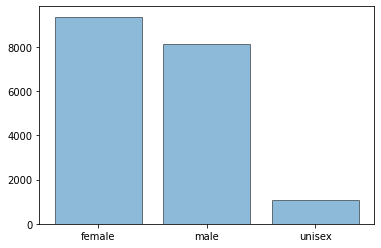

female    9372
male      8120
u         1099
Name: gender, dtype: int64

In [10]:
#Bar Chart untuk gender
gender = ['female','male','unisex']
plt.bar(gender, total_data.gender.value_counts(), align='center', alpha=0.5, edgecolor = 'black')
plt.show()

total_data.gender.value_counts()

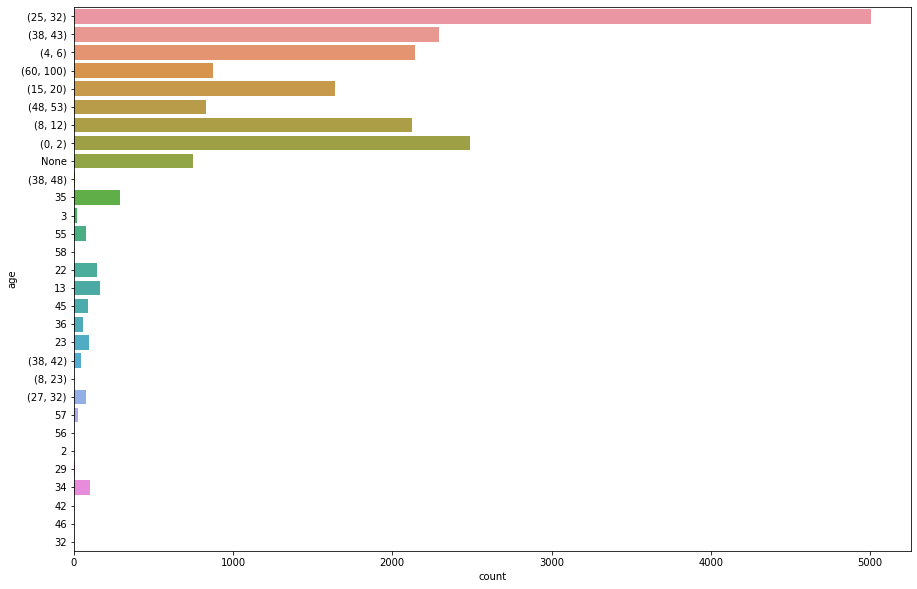

In [11]:
#Bar Chart untuk age
import seaborn as sns 
plt.figure(figsize=(15,10))
sns.countplot(y = total_data['age'])

In [12]:
total_data.age.value_counts()

(25, 32)     5004
(0, 2)       2488
(38, 43)     2293
(4, 6)       2140
(8, 12)      2124
(15, 20)     1642
(60, 100)     872
(48, 53)      830
None          748
35            293
13            168
22            149
34            105
23             96
45             88
(27, 32)       77
55             76
36             56
(38, 42)       46
57             24
3              18
29             11
(38, 48)        6
58              5
2               3
32              3
56              2
(8, 23)         1
46              1
42              1
Name: age, dtype: int64

In [13]:
#cek data nan/none dalam gender & age

print('Banyak nya data:', len(total_data))
print('===================================================')

print('Nilai data dari data gender:')
print(total_data.gender.unique())
print('---------------------------------------------------')
print('banyaknya nilai "nan" dalam gender:')
print(total_data.gender.isna().sum())
print('===================================================')

print('Nilai data dari data age:')
print(total_data.age.unique())
print('---------------------------------------------------')
print('banyak nya nilai "none" dalam age:')
print((total_data.age == 'None').sum())
print('===================================================')

Banyak nya data: 19370
Nilai data dari data gender:
['female' 'male' nan 'u']
---------------------------------------------------
banyaknya nilai "nan" dalam gender:
779
Nilai data dari data age:
['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']
---------------------------------------------------
banyak nya nilai "none" dalam age:
748


Image shape: (485, 484, 3)
Age: (25, 32) Gender: male


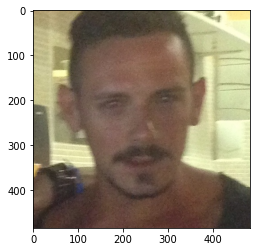

In [14]:
#sample satu gambar

import cv2
path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+total_data.user_id.loc[3]+"/coarse_tilt_aligned_face."+str(total_data.face_id.loc[3])+"."+total_data.original_image.loc[3]
image = cv2.imread(path)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
print('Image shape:', image.shape)
print('Age:', total_data.loc[3].age, 'Gender:', total_data.loc[3].gender)
print('===================================================')

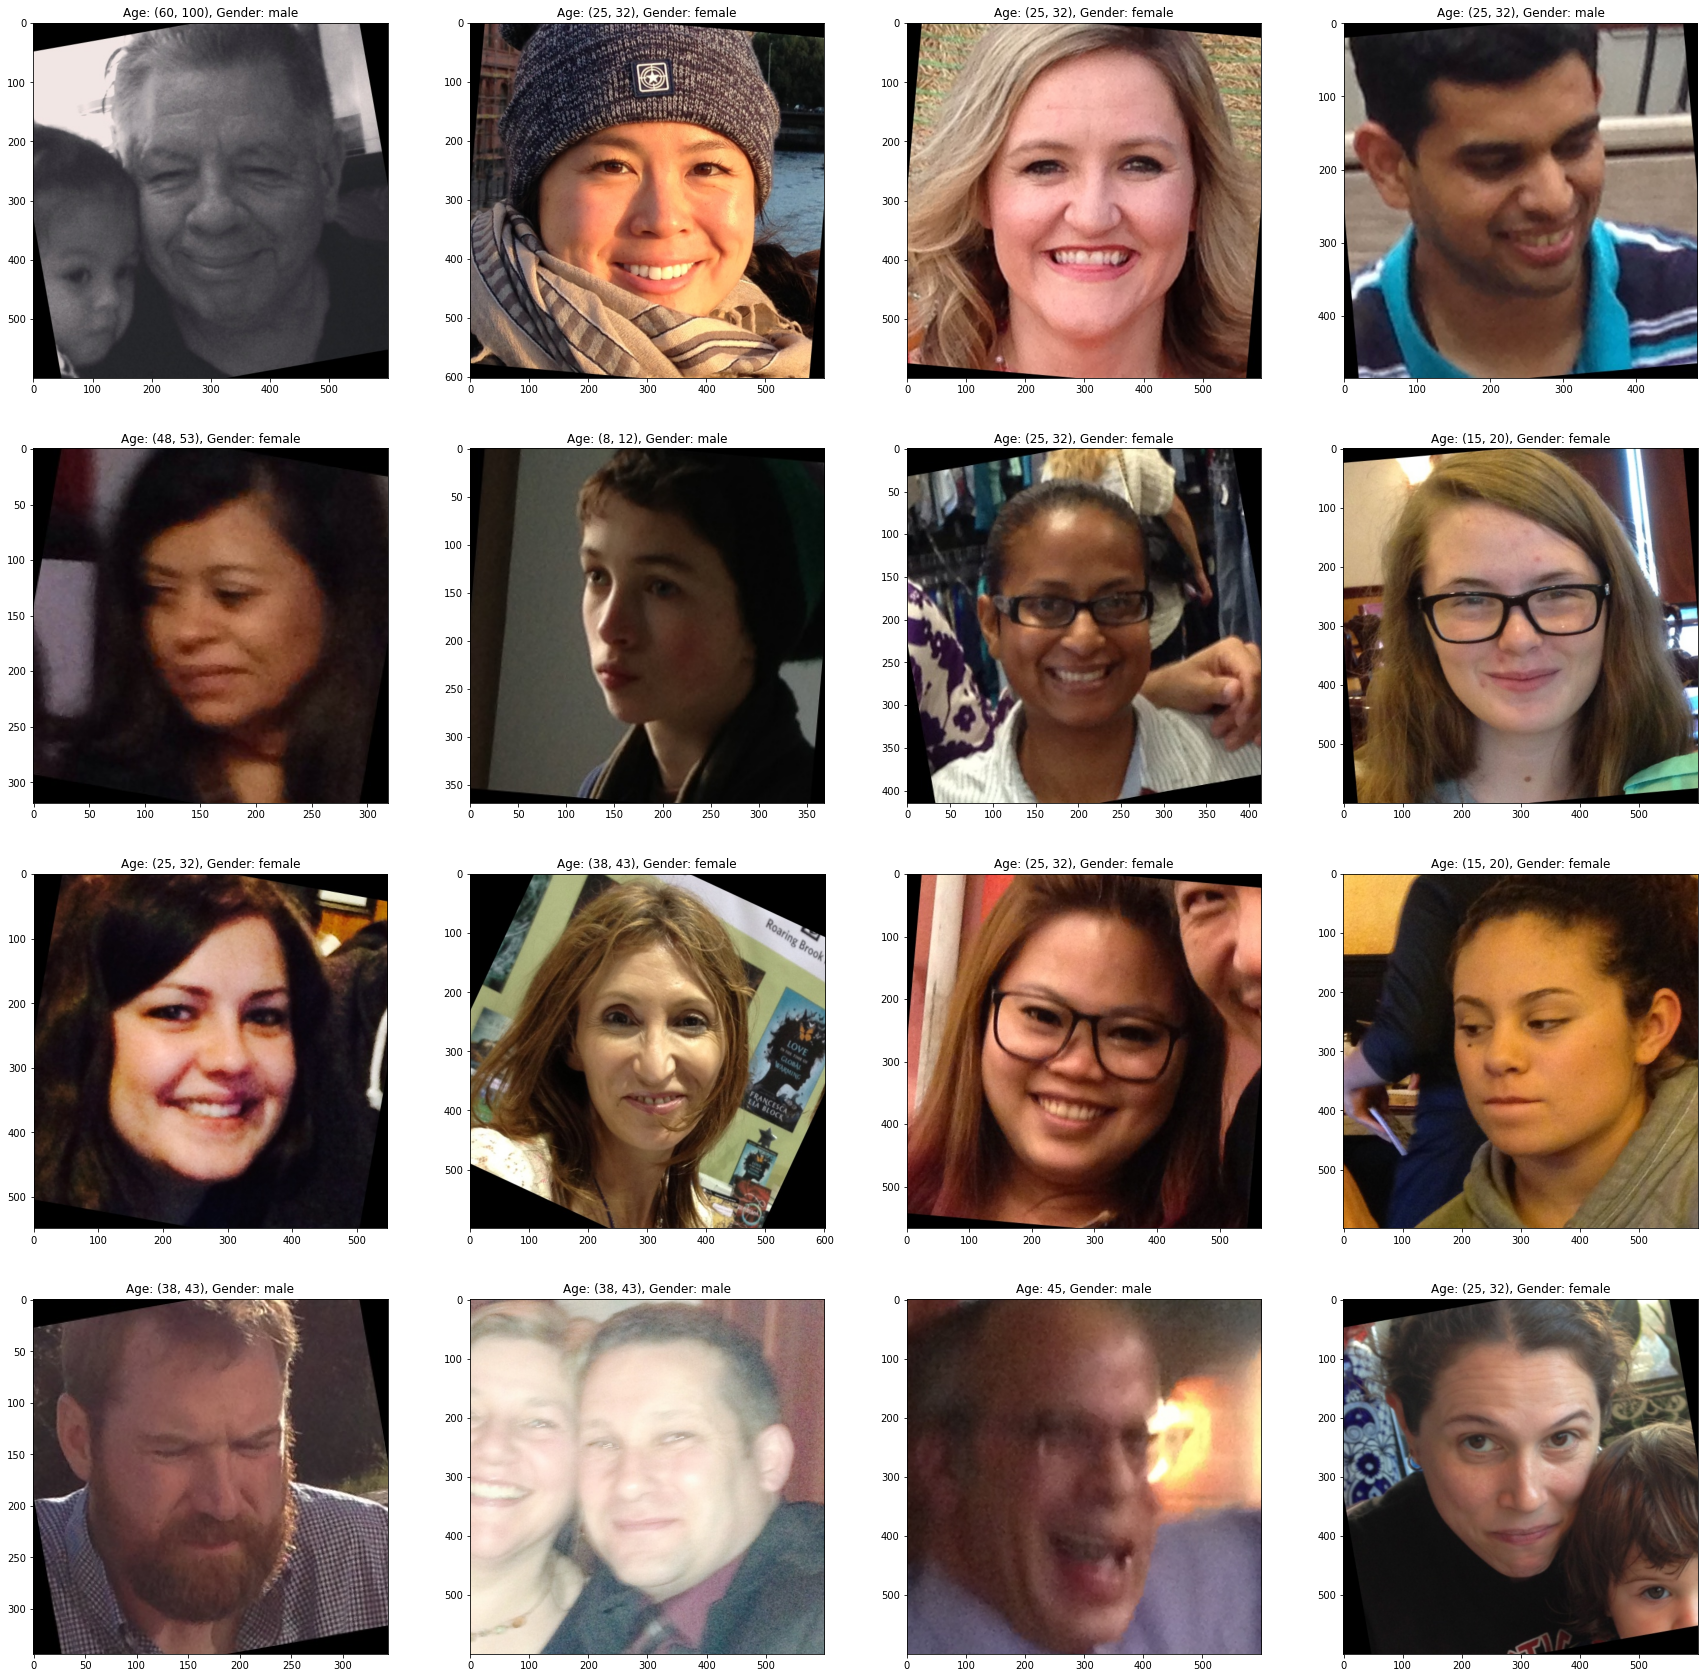

In [15]:
#Sample gambar 

import random
images = []

for _ in range(16):
    sample_num = random.randint(0, len(total_data))#random pilih gambar
    im_name = total_data.iloc[sample_num].original_image#pilih gambar dengan fungsi random
    im_path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+str(total_data.user_id.loc[sample_num])+"/coarse_tilt_aligned_face."+str(total_data.face_id.loc[sample_num])+"."+ im_name
    
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 4
    n_rows = 4
    images.append((image, age, gender))
    
fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(30,30))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

## Data Preprocessing (GENDER)

In [16]:
imp_data = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy() # copy data
imp_data.info()
img_path = [] #link path
for row in total_data.iterrows(): # link path merujuk gambar
    #merujuk kepada penyimpanan direktori gambar
    path = "AdienceBenchmarkGenderAndAgeClassification/faces/"+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path) #ditambahkan ke variabel img_path
imp_data['img_path'] = img_path #menamhkan kolom baru yaitu img_path, dengan isi link path gambarnya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     19370 non-null  object
 1   gender  18591 non-null  object
 2   x       19370 non-null  int64 
 3   y       19370 non-null  int64 
 4   dx      19370 non-null  int64 
 5   dy      19370 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 908.1+ KB


In [17]:
print(img_path)

['AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10399646885_67c7d20df9_o.jpg', 'AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.2.10424815813_e94629b1ec_o.jpg', 'AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10437979845_5985be4b26_o.jpg', 'AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.3.10437979845_5985be4b26_o.jpg', 'AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.2.11816644924_075c3d8d59_o.jpg', 'AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.11562582716_dbc2eb8002_o.jpg', 'AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.4.10424595844_1009c687e4_o.jpg', 'AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.5.9506931745_796300ca4a_o.jpg', 'AdienceBenchmarkGenderAndAgeCla

In [18]:
imp_data.head() # menampilkan 5 data teratas

age  gender  ...    dy                                           img_path
0  (25, 32)  female  ...  1383  AdienceBenchmarkGenderAndAgeClassification/fac...
1  (25, 32)    male  ...   641  AdienceBenchmarkGenderAndAgeClassification/fac...
2  (25, 32)  female  ...   771  AdienceBenchmarkGenderAndAgeClassification/fac...
3  (25, 32)    male  ...   485  AdienceBenchmarkGenderAndAgeClassification/fac...
4  (25, 32)    male  ...   768  AdienceBenchmarkGenderAndAgeClassification/fac...

[5 rows x 7 columns]

In [19]:
mapping = []
drop_labels = []

# age mapping
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping} # perulangan, each index 0 : each index 1


# for mapp in age_mapping:
#     mapping.append(mapp[0:])
# print(mapping)



#print cek mapping
print(age_mapping_dict)


{'(0, 2)': '0-2', '2': '0-2', '3': '0-2', '(4, 6)': '4-6', '(8, 12)': '8-13', '13': '8-13', '22': '15-20', '(8, 23)': '15-20', '23': '25-32', '(15, 20)': '15-20', '(25, 32)': '25-32', '(27, 32)': '25-32', '32': '25-32', '34': '25-32', '29': '25-32', '(38, 42)': '38-43', '35': '38-43', '36': '38-43', '42': '48-53', '45': '38-43', '(38, 43)': '38-43', '(38, 48)': '48-53', '46': '48-53', '(48, 53)': '48-53', '55': '48-53', '56': '48-53', '(60, 100)': '60+', '57': '60+', '58': '60+'}


In [20]:
for idx, each in enumerate(imp_data.age): # membuat perulangan, idx = index dr enumerate, each = mapping
    if each == 'None': #jika terdapat  data pada kolom age yg kosong maka akan di drop/dihapus
        drop_labels.append(idx)
    else: # maka index yg dituju = age mapping yang dituju
        imp_data.age.loc[idx] = age_mapping_dict[each]

imp_data = imp_data.drop(labels=drop_labels, axis=0) #droped None values
imp_data.age.value_counts(dropna=False) # mengabaikan nilai nannya

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [21]:
# mengahpus semua nilai nan
imp_data = imp_data.dropna()

# mengcopy data jenis kelamain male, female dan mengabaikan jenis kelamin yang u/unisex
clean_data = imp_data[imp_data.gender != 'u'].copy()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


In [22]:
#merubah string menjadi numerik pada atribut gender
gender_to_label_map = {
    'female' : 0,
    'male' : 1
}

#lalu menerapkan ke dalam datasetnya
clean_data['gender'] = clean_data['gender'].apply(lambda g: gender_to_label_map[g])
clean_data.head()

age  gender  ...    dy                                           img_path
0  25-32       0  ...  1383  AdienceBenchmarkGenderAndAgeClassification/fac...
1  25-32       1  ...   641  AdienceBenchmarkGenderAndAgeClassification/fac...
2  25-32       0  ...   771  AdienceBenchmarkGenderAndAgeClassification/fac...
3  25-32       1  ...   485  AdienceBenchmarkGenderAndAgeClassification/fac...
4  25-32       1  ...   768  AdienceBenchmarkGenderAndAgeClassification/fac...

[5 rows x 7 columns]

In [23]:
#cek data unixnya
clean_data['gender'].value_counts()

0    9332
1    8120
Name: gender, dtype: int64

In [24]:
# dengan metode yang sama seperti di atas, merubah string menjadi numerik lalu menerapakannya di atribut age
age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

#menerpakan ke atribut age
clean_data['age'] = clean_data['age'].apply(lambda age: age_to_label_map[age])
clean_data.head()

age  gender  ...    dy                                           img_path
0    4       0  ...  1383  AdienceBenchmarkGenderAndAgeClassification/fac...
1    4       1  ...   641  AdienceBenchmarkGenderAndAgeClassification/fac...
2    4       0  ...   771  AdienceBenchmarkGenderAndAgeClassification/fac...
3    4       1  ...   485  AdienceBenchmarkGenderAndAgeClassification/fac...
4    4       1  ...   768  AdienceBenchmarkGenderAndAgeClassification/fac...

[5 rows x 7 columns]

In [26]:
from PIL import Image
from sklearn.model_selection import train_test_split

X = clean_data[['img_path']]
y = clean_data[['gender']]

# split data train, test menggunakan modul train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#ceking dimensi train dan test data
print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

train_images = []
test_images = []


for row in X_train.iterrows(): # merujuk kepada penyimpanan direktori
    image = Image.open(row[1].img_path) #menuju img_path
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)
Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


## GENDER MODEL

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [ ]:
ACCURACY_THRESHOLD = 0.95

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy') > ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=64,strides=1, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3),strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3),strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3),strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation='softmax'))
model.summary() 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 225, 225, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [ ]:
best_model_gender_path = 'best_model_gender.h5'
checkpoint_callback = ModelCheckpoint(best_model_gender_path,
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     verbose=1)
reduce_callback = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.000003, verbose=1)
Early_Stopping = myCallback()
callbacks_list = [checkpoint_callback, reduce_callback,Early_Stopping]

In [ ]:
learning_rate=0.000001
model.compile(loss='SparseCategoricalCrossentropy',
             optimizer=Adam(lr=learning_rate),
             metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
start = time.time()
H = model.fit(train_images, y_train, batch_size=32, epochs=100, validation_data=(test_images, y_test),callbacks=[callbacks_list])

End = time.time()
print ("training time: ", End-start,"s")

Epoch 1/100
382/382 [==============================] - ETA: 0s - loss: 0.8668 - accuracy: 0.5627
Epoch 00001: val_accuracy improved from -inf to 0.60390, saving model to best_model_gender.h5
382/382 [==============================] - 90s 154ms/step - loss: 0.8668 - accuracy: 0.5627 - val_loss: 0.6868 - val_accuracy: 0.6039 - lr: 1.0000e-06
Epoch 2/100
382/382 [==============================] - ETA: 0s - loss: 0.7254 - accuracy: 0.6069
Epoch 00002: val_accuracy improved from 0.60390 to 0.64305, saving model to best_model_gender.h5
382/382 [==============================] - 60s 157ms/step - loss: 0.7254 - accuracy: 0.6069 - val_loss: 0.6444 - val_accuracy: 0.6430 - lr: 1.0000e-06
Epoch 3/100
382/382 [==============================] - ETA: 0s - loss: 0.6678 - accuracy: 0.6435
Epoch 00003: val_accuracy improved from 0.64305 to 0.66769, saving model to best_model_gender.h5
382/382 [==============================] - 56s 147ms/step - loss: 0.6678 - accuracy: 0.6435 - val_loss: 0.6137 - val_ac

## Model Save Weight

In [ ]:
model.save_weights('best_model_gender.h5')

In [ ]:
model.get_weights()

[array([[[[ 0.07796505,  0.01798963,  0.00062036, ..., -0.03625186,
            0.0178707 , -0.05739057],
          [-0.06004988,  0.05231256,  0.00273894, ..., -0.06438793,
            0.10000611, -0.07159378],
          [ 0.05046339, -0.05104038, -0.04252239, ...,  0.03230472,
            0.04714698,  0.01164379]],
 
         [[ 0.06475364,  0.04452803, -0.00970777, ...,  0.02245606,
           -0.04167945,  0.08706317],
          [-0.02049986, -0.06573551,  0.00403194, ..., -0.02846649,
           -0.04689172,  0.04160444],
          [-0.06156999,  0.00683143, -0.02950137, ..., -0.00676705,
            0.01623933,  0.07834975]],
 
         [[-0.06010252,  0.04687752,  0.02831002, ..., -0.03844756,
           -0.09588228,  0.07484441],
          [ 0.02407589, -0.01622204, -0.09793926, ...,  0.0062279 ,
           -0.06246756, -0.08767808],
          [-0.03657176,  0.04612684, -0.0849097 , ..., -0.03447824,
            0.07961831,  0.06154551]]],
 
 
        [[[ 0.0511233 , -0.0701403

## Evaluate Gender

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

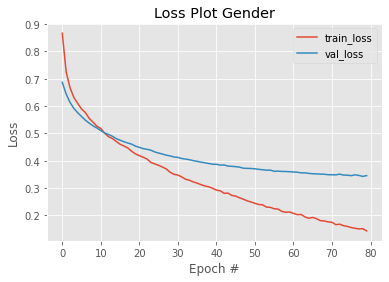

<Figure size 432x288 with 0 Axes>

In [ ]:

%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 80), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 80), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot Gender")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.savefig('loss-plot-gender.svg')  

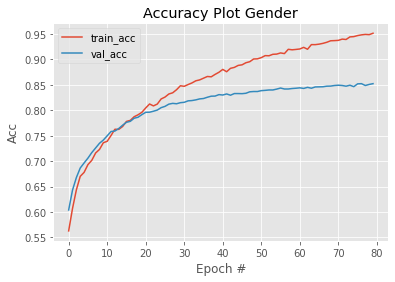

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 80), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 80), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot Gender")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

plt.savefig('accuracy-plot-gender.svg')  

In [ ]:
model.load_weights(best_model_gender_path)

ypred = model.predict(test_images)
predictions = np.argmax(ypred, axis = 1)

print("Classification Repot for GENDER")
print(classification_report(y_test,predictions))

Classification Repot for GENDER
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2744
           1       0.85      0.83      0.84      2492

    accuracy                           0.85      5236
   macro avg       0.85      0.85      0.85      5236
weighted avg       0.85      0.85      0.85      5236



## Data Preprocessing (AGE)

In [27]:
X = clean_data[['img_path']]
y = clean_data[['age']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)
Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


## AGE MODEL

In [28]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, LayerNormalization
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [29]:
ACCURACY_THRESHOLD = 0.95

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy') > ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

In [30]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=8, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 layer_normalization (LayerN  (None, 28, 28, 96)       192       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                        

In [31]:
best_model_age_path = 'best_model_age.h5'
checkpoint_callback = ModelCheckpoint(best_model_age_path,
                                     monitor='val_accuracy',
                                     save_best_only=True,
                                     verbose=1)
reduce_callback = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.000003, verbose=1)
Early_Stopping = myCallback()
callbacks_list = [checkpoint_callback, reduce_callback,Early_Stopping]

In [32]:
learning_rate=0.000001
model.compile(loss='SparseCategoricalCrossentropy',
             optimizer=Adam(lr=learning_rate),
             metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [33]:
start = time.time()
H = model.fit(train_images, y_train, batch_size=32, epochs=100, validation_data=(test_images, y_test),callbacks=[callbacks_list])

End = time.time()
print ("training time: ", End-start,"s")

Epoch 1/100
382/382 [==============================] - ETA: 0s - loss: 2.1409 - accuracy: 0.2220
Epoch 00001: val_accuracy improved from -inf to 0.29565, saving model to best_model_age.h5
382/382 [==============================] - 58s 70ms/step - loss: 2.1409 - accuracy: 0.2220 - val_loss: 1.9104 - val_accuracy: 0.2956 - lr: 1.0000e-06
Epoch 2/100
381/382 [============================>.] - ETA: 0s - loss: 1.9654 - accuracy: 0.2703
Epoch 00002: val_accuracy improved from 0.29565 to 0.29870, saving model to best_model_age.h5
382/382 [==============================] - 24s 64ms/step - loss: 1.9650 - accuracy: 0.2703 - val_loss: 1.8827 - val_accuracy: 0.2987 - lr: 1.0000e-06
Epoch 3/100
382/382 [==============================] - ETA: 0s - loss: 1.9244 - accuracy: 0.2871
Epoch 00003: val_accuracy improved from 0.29870 to 0.30195, saving model to best_model_age.h5
382/382 [==============================] - 24s 64ms/step - loss: 1.9244 - accuracy: 0.2871 - val_loss: 1.8697 - val_accuracy: 0.30

## Model Save Weight

In [34]:
model.save_weights('best_model_age.h5')

In [35]:
model.get_weights()

[array([[[[-1.74042303e-02, -1.54435486e-02,  7.31268013e-03, ...,
            2.19149282e-03,  8.45602807e-03, -8.37796461e-03],
          [-1.24465590e-02,  2.76620500e-02, -2.90067904e-02, ...,
           -8.00479110e-03, -1.54231498e-02, -1.90840233e-02],
          [-2.96332804e-03, -3.17298621e-02, -2.49009077e-02, ...,
           -9.35566332e-03,  5.37351146e-03, -7.07551744e-03]],
 
         [[-1.34473182e-02, -1.21852914e-02, -2.60733422e-02, ...,
            1.54896034e-02, -2.01668572e-02, -1.45918326e-02],
          [-8.10543727e-03,  2.87121758e-02, -1.57377739e-02, ...,
            1.54857924e-02, -1.90804992e-02,  1.96325779e-02],
          [-9.39870812e-03,  2.49696220e-03, -2.80731674e-02, ...,
           -2.68674195e-02,  1.06869405e-03,  9.77351889e-03]],
 
         [[-7.41255283e-03, -9.89534333e-03, -6.62782183e-03, ...,
            3.64906597e-03, -2.87997760e-02,  8.61144252e-03],
          [-2.27621850e-03,  1.76472180e-02,  2.88046803e-02, ...,
            1.540

## Evaluate Age


In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix

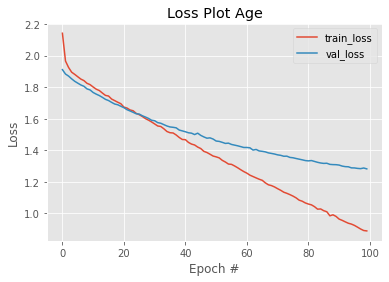

<Figure size 432x288 with 0 Axes>

In [38]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot Age")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.savefig('loss-plot-age.svg')  

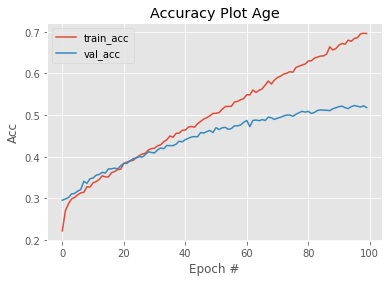

<Figure size 432x288 with 0 Axes>

In [39]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot Age")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

plt.savefig('accuracy-plot-gender.svg') 

In [40]:
model.load_weights(best_model_age_path)

ypred = model.predict(test_images)
predictions = np.argmax(ypred, axis = 1)

print("Classification Repot for AGE")
print(classification_report(y_test,predictions))

Classification Repot for AGE
              precision    recall  f1-score   support

           0       0.70      0.56      0.62       422
           1       0.60      0.61      0.61       625
           2       0.53      0.46      0.49       662
           3       0.46      0.33      0.38       558
           4       0.50      0.78      0.61      1558
           5       0.43      0.37      0.40       879
           6       0.33      0.05      0.09       267
           7       0.75      0.25      0.37       265

    accuracy                           0.52      5236
   macro avg       0.54      0.42      0.45      5236
weighted avg       0.52      0.52      0.50      5236

